In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar100.load_data()

In [ ]:
X_train.shape


(50000, 32, 32, 3)

In [ ]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

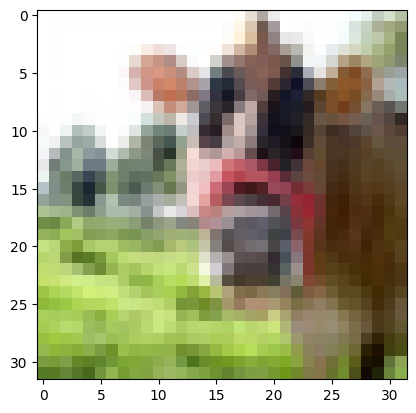

In [ ]:
plt.imshow(X_train[0])

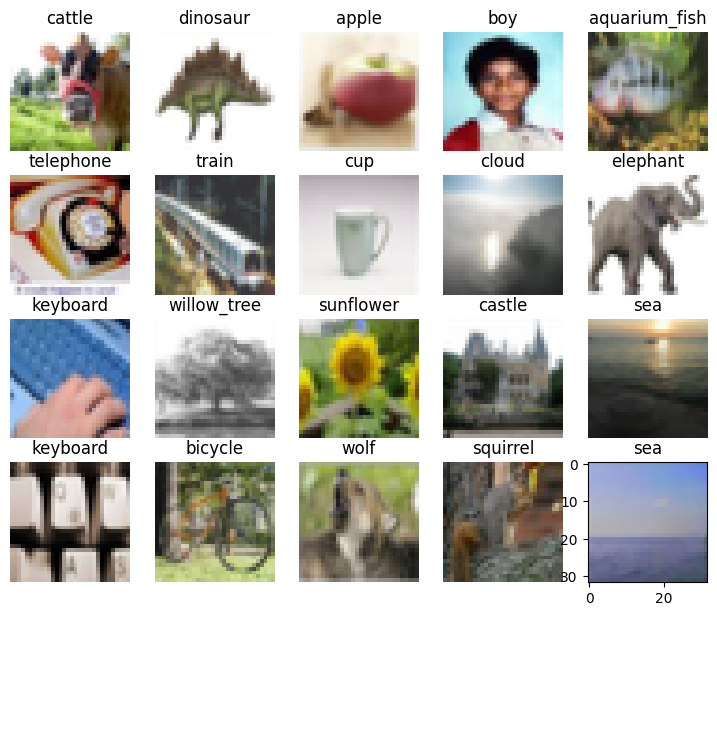

In [ ]:
plt.figure(figsize=(9,9))
for i in range(20):
  plt.axis('off')
  cifar100_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'stockings', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']

  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.title( cifar100_labels[y_train[i][0]])
plt.show()

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
cnn = Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',padding ='same',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,3,padding = 'same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(24,3,padding = 'same',activation='relu'),
    tf.keras.layers.Flatten(),
    Dense(600,activation='relu'),
    tf.keras.layers.Dropout(0.20), # Increased dropout rate
    Dense(100,activation='softmax')

])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0901 - loss: 4.0218 - val_accuracy: 0.2477 - val_loss: 3.0831
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.2676 - loss: 2.9600 - val_accuracy: 0.3007 - val_loss: 2.8410
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3491 - loss: 2.5557 - val_accuracy: 0.3352 - val_loss: 2.6705
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4127 - loss: 2.2481 - val_accuracy: 0.3536 - val_loss: 2.5900
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4733 - loss: 1.9815 - val_accuracy: 0.3727 - val_loss: 2.5534
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5276 - loss: 1.7282 - val_accuracy: 0.3734 - val_loss: 2.6615
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5835 - loss: 1.4920 - val_accuracy: 0.3694 - val_loss: 2.7220
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6368 - loss: 1.27

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3502 - loss: 3.3142


[3.320152759552002, 0.3472000062465668]

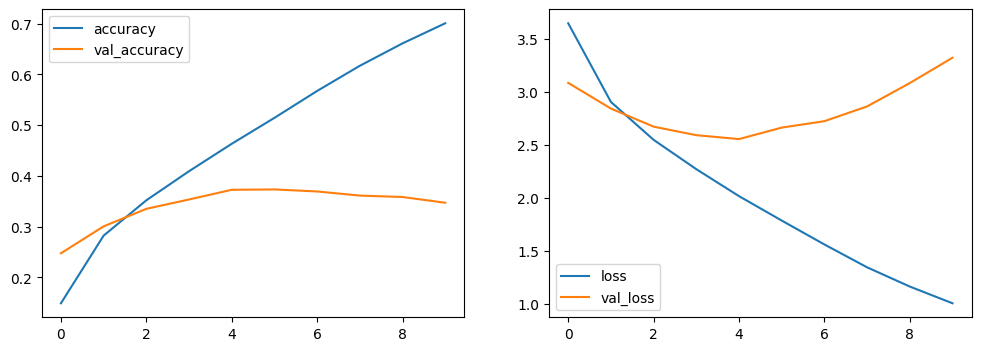

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
prediction = cnn.predict(X_test)
for i in range(20):
  predicted = np.argmax(prediction[i])
  true_labels = y_test[i][0]
  print(f"image{i} predicted_label:{cifar100_labels[predicted]}, and the true_value was {cifar100_labels[true_labels]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
image0 predicted_label:dolphin, and the true_value was mountain
image1 predicted_label:forest, and the true_value was forest
image2 predicted_label:beaver, and the true_value was seal
image3 predicted_label:bus, and the true_value was mushroom
image4 predicted_label:sea, and the true_value was sea
image5 predicted_label:spider, and the true_value was tulip
image6 predicted_label:crocodile, and the true_value was camel
image7 predicted_label:possum, and the true_value was butterfly
image8 predicted_label:cloud, and the true_value was cloud
image9 predicted_label:sweet_pepper, and the true_value was apple
image10 predicted_label:television, and the true_value was sea
image11 predicted_label:porcupine, and the true_value was skunk
image12 predicted_label:pickup_truck, and the true_value was stockings
image13 predicted_label:rocket, and the true_value was rocket
image14 predicted_label:lamp, and the true_value was lamp
image15 predicted_label:lion, 